In [1]:
import gizmo_analysis as gizmo
import utilities as ut
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate
%matplotlib notebook

In [2]:
# you can access the files as named or use the aliases in __init__.py to keep it shorter 
# for example, these are the same:

gizmo.gizmo_io
gizmo.io

<module 'gizmo_analysis.gizmo_io' from 'C:\\Users\\binod\\gizmo_analysis\\gizmo_io.py'>

In [3]:
simname=''
simdir='C:\\Users\\binod\\m12i.res57000'
part = gizmo.io.Read.read_snapshots(['star'],'snapshot_index', 600, assign_hosts=True, assign_hosts_rotation=True , simulation_name=simname, simulation_directory=simdir+simname)



# in utilities.simulation.Snapshot():
* reading:  C:\Users\binod\m12i.res57000/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  C:\Users\binod\m12i.res57000/output\snapshot_600.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 8820344 particles
    dark2     (id = 2): 3081337 particles
    gas       (id = 0): 5969934 particles
    star      (id = 4): 3059250 particles
    blackhole (id = 5): 0 particles

* reading species: ['star']
* reading particles from:
    C:\Users\binod\m12i.res57000/output\snapshot_600.hdf5

! cannot find MUSIC config file:  C:\Users\binod\m12i.res57000/*/*.conf
! missing cosmological parameters, assuming the following (from AGORA box):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.961

* checking sanity of particle properties

  cannot read file containing hosts coordinates
  instead will assign hosts via iterative

In [4]:
# properties of star particles are stored via dictionary

part['star'].keys()

dict_keys(['position', 'mass', 'massfraction', 'id.child', 'id.generation', 'id', 'potential', 'form.scalefactor', 'velocity'])

In [5]:
# 3-D position of star particle (particle number x dimension number) [kpc comoving]

starposition=part['star']['position'] # starposition is the array of position of all stars
ageall=part['star'].prop('age') #stored all ages in a
 
xall = part['star'].prop('host.distance.principal')[:,0] #x component of the position of all stars 
yall = part['star'].prop('host.distance.principal')[:,1] #y component of the position of all stars
zall = part['star'].prop('host.distance.principal')[:,2] #z component of the position of all stars
nall=len(xall) # counting the total no. of star particles

n=nall # This is the no. of stars we are going to use. n=nall means choose all, n=100 means choose 100


                
smallpart=starposition[0:n] # This is selecting a small part from the collection of all star positions

x=xall[0:n] # select x components from 0 to n
y=yall[0:n] # select y components from 0 to n
z=zall[0:n] # select z components from 0 to n
age=ageall[0:n]*1e9 #age converted to years Note: NOT IN GYR ANYMORE !!!!!!!!!!!

R=np.sqrt(np.square(x)+np.square(y)) #calculate the radius in the xy plane
r=np.sqrt(x**2+y**2+z**2) #calculate the spherical radius in the xyz plane
#print("\nThe data to plot is: \n",tabulate(smallpart,headers=["x","y","z"])) #It was used to print the data in tabulate form

In [6]:
ind_R7to9=np.where((R>7) & (R<9)) #Select those stars with r greater than 7 and less than 9

x_R7to9=x[ind_R7to9] #find the x components only of the slection
y_R7to9=y[ind_R7to9] #find the y components only of the slection
z_R7to9=z[ind_R7to9]
age_R7to9=age[ind_R7to9]

R_R7to9=R[ind_R7to9] #store the cylindrical radius in array Note: the values should be between 7 and 9

#print(min(R_R7to9),max(R_R7to9))
#print(min(z_R7to9),max(z_R7to9))

r_R7to9=r[ind_R7to9] #store the spherical radius in array
#print(min(r_R7to9),max(r_R7to9))

<IPython.core.display.Javascript object>


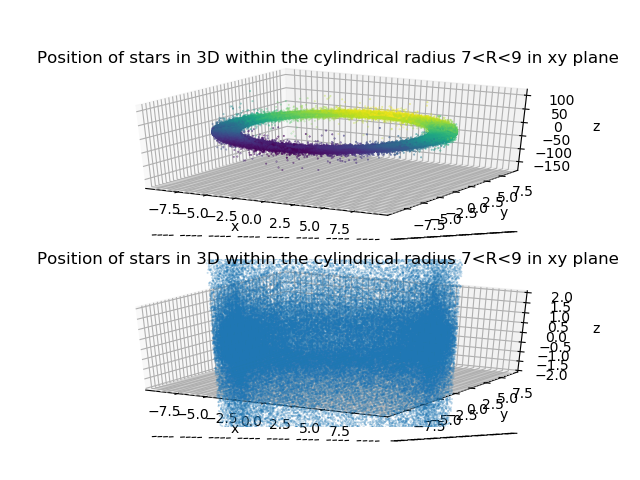

In [20]:
#3d plots of the position
fig1 = plt.figure()
ax1 = fig1.add_subplot(211, projection='3d')
ax1.scatter(x_R7to9,y_R7to9,z_R7to9,c=y_R7to9,marker=".",s=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
#ax1.set_zlim(-2,2)
ax1.set_title('Position of stars in 3D within the cylindrical radius 7<R<9 in xy plane')
ax1.minorticks_on()

plt.subplots_adjust(wspace=1)

ax2 = fig1.add_subplot(212, projection='3d')
ax2.scatter(x_R7to9,y_R7to9,z_R7to9,marker=".",s=0.5)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_zlim(-2,2)
ax2.set_title('Position of stars in 3D within the cylindrical radius 7<R<9 in xy plane')
ax2.minorticks_on()
fig1.savefig("./plots/R7to9_in_xyplane_3D.png")

In [8]:
d_xyz=np.sqrt(x_R7to9**2+(y_R7to9-8)**2+z_R7to9**2)   #calculate radius of all stars in xy plane form a point 
                                                        #inside the selection we made previously. Here the point is (0,8)D
D_xy=np.sqrt(x_R7to9**2+(y_R7to9-8)**2)


#print(len(d_xyz),len(D_xy))

ind_d_xyz_lessthan1=np.where(d_xyz<1)
ind_D_xy_lessthan1=np.where(D_xy<1)

d_xyz_lessthan1=d_xyz[ind_d_xyz_lessthan1] #the length of this array is 969 here we stored those distances that are less than 1 in xyz plane
D_xy_lessthan1=D_xy[ind_D_xy_lessthan1] #the length of this array is 2952 as it has smaller restriction

#print(len(d_xyz_lessthan1),len(D_xy_lessthan1))



In [9]:
x_d_xyz_lessthan1=x_R7to9[ind_d_xyz_lessthan1] 
y_d_xyz_lessthan1=y_R7to9[ind_d_xyz_lessthan1]
z_d_xyz_lessthan1=z_R7to9[ind_d_xyz_lessthan1]
R_d_xyz_lessthan1=R_R7to9[ind_d_xyz_lessthan1]
r_d_xyz_lessthan1=r_R7to9[ind_d_xyz_lessthan1]
age_d_xyz_lessthan1=age_R7to9[ind_d_xyz_lessthan1] #ages of star in the region R7to9 that are withtin d<1 in xyz plane

x_D_xy_lessthan1=x_R7to9[ind_D_xy_lessthan1] 
y_D_xy_lessthan1=y_R7to9[ind_D_xy_lessthan1]
z_D_xy_lessthan1=z_R7to9[ind_D_xy_lessthan1]
R_D_xy_lessthan1=R_R7to9[ind_D_xy_lessthan1]
r_D_xy_lessthan1=r_R7to9[ind_D_xy_lessthan1]
age_D_xy_lessthan1=age_R7to9[ind_D_xy_lessthan1] #ages of star in the region R7to9 that are withtin D<1 in xyz plane



<IPython.core.display.Javascript object>


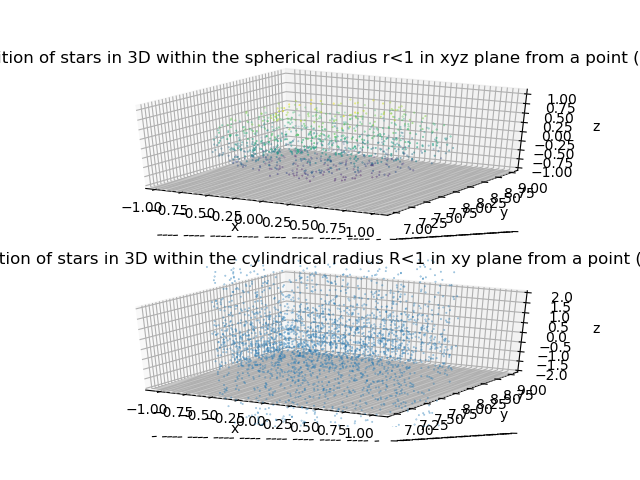

In [25]:
fig2 = plt.figure()
ax1 = fig2.add_subplot(211, projection='3d')
ax1.scatter(x_d_xyz_lessthan1,y_d_xyz_lessthan1,z_d_xyz_lessthan1,c=z_d_xyz_lessthan1,marker=".",s=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
#ax1.set_zlim(-10,10)
ax1.set_title('Position of stars in 3D within the spherical radius r<1 in xyz plane from a point (0,8,0)')
ax1.minorticks_on()

ax2 = fig2.add_subplot(212, projection='3d')
ax2.scatter(x_D_xy_lessthan1,y_D_xy_lessthan1,z_D_xy_lessthan1,marker=".",s=0.5)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_zlim(-2,2)
ax2.set_title('Position of stars in 3D within the cylindrical radius R<1 in xy plane from a point (0,8,0)')
ax2.minorticks_on()
fig2.savefig("./plots/R_and_r_lessthan1_3D.png")


In [11]:
#Now looking for particular age groups from the above selection

ind_age_young_d_xyz=np.where((np.log10(age_d_xyz_lessthan1)>7)&(np.log10(age_d_xyz_lessthan1)<8))
ind_age_old_d_xyz=np.where((np.log10(age_d_xyz_lessthan1)>9)&(np.log10(age_d_xyz_lessthan1)<9.5))    

print(np.log10(age_D_xy_lessthan1))
print(len(age_D_xy_lessthan1))
ind_age_young_D_xy=np.where((np.log10(age_D_xy_lessthan1)>7)&(np.log10(age_D_xy_lessthan1)<8))
ind_age_old_D_xy=np.where((np.log10(age_D_xy_lessthan1)>9)&(np.log10(age_D_xy_lessthan1)<9.5)) 

age_young_D_xy=age_D_xy_lessthan1[ind_age_young_D_xy]                          
x_young_D_xy=x_D_xy_lessthan1[ind_age_young_D_xy] 
y_young_D_xy=y_D_xy_lessthan1[ind_age_young_D_xy]   
z_young_D_xy=z_D_xy_lessthan1[ind_age_young_D_xy] 

age_old_D_xy=age_D_xy_lessthan1[ind_age_old_D_xy]                          
x_old_D_xy=x_D_xy_lessthan1[ind_age_old_D_xy] 
y_old_D_xy=y_D_xy_lessthan1[ind_age_old_D_xy]   
z_old_D_xy=z_D_xy_lessthan1[ind_age_old_D_xy] 



print(len(age_young_D_xy))


[ 9.9234974  10.02402164  9.60440073 ... 10.02627583 10.01939032
 10.08439886]
2990
0


<IPython.core.display.Javascript object>


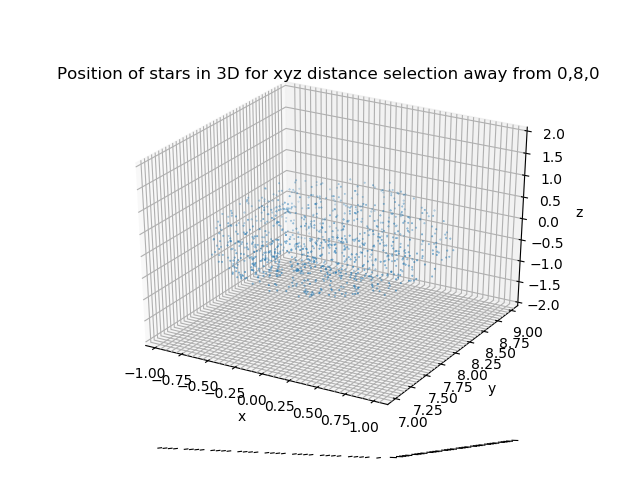

<IPython.core.display.Javascript object>


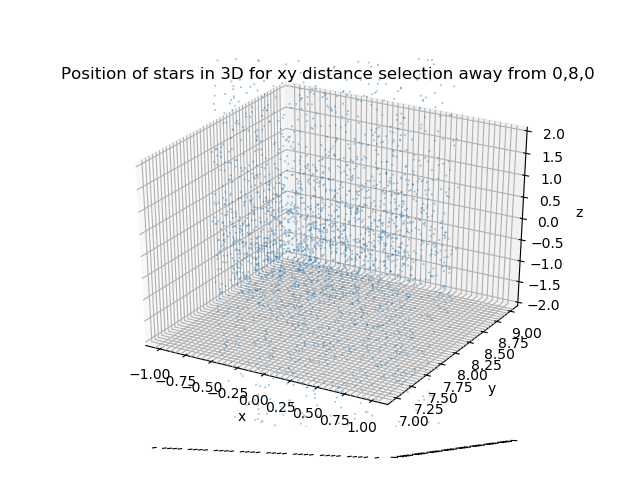

In [12]:
#3d plots of the position
fig3 = plt.figure()
ax1 = fig3.add_subplot(111, projection='3d')
ax1.scatter(x_d_xyz_lessthan1,y_d_xyz_lessthan1,z_d_xyz_lessthan1,marker=".",s=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_zlim(-2,2)
ax1.set_title('Position of stars in 3D for xyz distance selection away from 0,8,0')
ax1.minorticks_on()
#fig2.savefig("positionplots3d.png")


fig4 = plt.figure()
ax1 = fig4.add_subplot(111, projection='3d')
ax1.scatter(x_D_xy_lessthan1,y_D_xy_lessthan1,z_D_xy_lessthan1,marker=".",s=0.5)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_zlim(-2,2)
ax1.set_title('Position of stars in 3D for xy distance selection away from 0,8,0')
ax1.minorticks_on()
#fig2.savefig("positionplots3d.png")

